# CSE 5520 Homework 3

| | |
|-|-|
| **Student** | Lynn Pepin ('Tristan Pepin')
|              | tmp13009 / 2079724
| **Due date** | 2021 / Sept / 23 (Thur), 11:59PM


This is Lynn Pepin's report for CSE 5520 homework 3.

TODO:

 - [ ] Review each cell
 - [ ] Remove 'FINAL'
 - [ ] Do a final render-pass

# Part 1: Linear Regression.

Consider a simple set of data points $\{\langle2,2\rangle, \langle3,3\rangle, \langle4,5\rangle, \langle6,4\rangle\}$.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

points = np.array([(2,2), (3,3), (4,5), (6,4)])
# points[:,0] represent x
# points[:,1] represent y

EPS = 0.0000001
FINAL = False

def almost_equal(a,b,eps=EPS):
    return abs(a-b) <= eps


## Step 1:

Show the given $<x, y>$ data points in a 2D plot

## Step 2:

Draw the regression line over the plot shown in Step 1. Steps 1 and 2 should be done in one cell of Jupyter Notebook.

Text(0.5, 1.0, 'HW3 Part 1 Step 2: Points and regression')

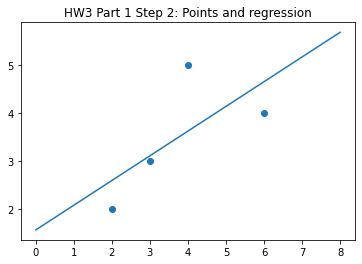

In [2]:
# original dataset
points = np.array([(2,2), (3,3), (4,5), (6,4)])

# 1. Get the linear regression coefficients (i.e. slope and y-intercept) using np.polyfit with degree 1
# (note: i'd usually refer to these as c_0, c_1, ...)
mm, bb = np.polyfit(x=points[:,0], y=points[:,1], deg=1)

# 2. reg_fit is a simple slope (y=mx+b); reg_Xs and reg_Ys are the X/Y values
reg_fit = lambda xx: mm*xx + bb
reg_Xs = np.linspace(0,8,81)
reg_Ys = [reg_fit(xx) for xx in reg_Xs]

# Plot our line and our points
plt.scatter(points[:,0], points[:,1])
plt.plot(reg_Xs, reg_Ys)

plt.title("HW3 Part 1 Step 2: Points and regression")

## Step 3:

Create a separate markdown cell and include your manual calculation of the components of the equation designed to produce the linear regression line. 

Hint: You can do calculation using MS Excel and import the snipped image in the markdown cell. There are other ways also. This hand calculation should show how intercept and slope are calculated. 

In [3]:
# original dataset
points = np.array([(2,2), (3,3), (4,5), (6,4)])
Xs = points[:,0]
Ys = points[:,1]
c_1_true, c_0_true = np.polyfit(x=Xs, y=Ys, deg=1)

# y intercept
denom = len(Xs)*(Xs@Xs) - sum(Xs)**2
c_0 = (sum(Ys)*(Xs@Xs) - sum(Xs)*(Xs@Ys)) / denom

# slope
c_1 = (len(Xs)*(Xs@Ys) - sum(Xs)*sum(Ys)) / denom

# check my work
assert almost_equal(c_0, c_0_true), "Mistake calculating intercept"
assert almost_equal(c_1, c_1_true), "Mistake calculating slope"

## Step 4:

Show how covariance matrix is calculated using python. Print the value.

In [5]:
# original dataset
points = np.array([(2,2), (3,3), (4,5), (6,4)])
Xs = points[:,0]
Ys = points[:,1]
NN = len(Xs)

# One way to calculate covariance
cov_matrix = np.cov([Xs, Ys])

assert cov_matrix[0,1] == cov_matrix[1,0], "What? How can these be different?"

print("Covariance matrix:")
print(np.round(cov_matrix, 5))

Covariance matrix:
[[2.91667 1.5    ]
 [1.5     1.66667]]


## Step 5:

Create a separate markdown cell and include your manual calculation of the components of the equation designed to produce covariance matrix. 

In [6]:
# original dataset
points = np.array([(2,2), (3,3), (4,5), (6,4)])
Xs = points[:,0]
Ys = points[:,1]
NN = len(Xs)

# One way to calculate covariance
cov_matrix = np.cov([Xs, Ys])

# Another way to calculate covariance
cov_xx = sum([(xi - Xs.mean())**2 for xi in Xs])/(NN-1)
cov_yy = sum([(yi - Ys.mean())**2 for yi in Ys])/(NN-1)
cov_xy = (Xs - Xs.mean())@(Ys - Ys.mean()) / (NN-1)

# Confirm our work
cov_xx_true = cov_matrix[0,0]
cov_yy_true = cov_matrix[1,1]
cov_xy_true = cov_matrix[0,1]
cov_yx_true = cov_matrix[1,0]

assert cov_xy_true == cov_yx_true, "What? How can these be different?"
assert almost_equal(cov_xx, cov_xx_true), "Mistake calculating cov_xx"
assert almost_equal(cov_xy, cov_xy_true), "Mistake calculating cov_xy"
assert almost_equal(cov_yy, cov_yy_true), "Mistake calculating cov_xy"

print("Covariance matrix:")
cov_matrix = np.array([[cov_xx, cov_xy], [cov_xy, cov_yy]])
print(np.round(cov_matrix, 5))

Covariance matrix:
[[2.91667 1.5    ]
 [1.5     1.66667]]


## Step 6:

Show how Pearson’s correlation coefficient is computed using python. Print the value.



In [7]:
# original dataset
points = np.array([(2,2), (3,3), (4,5), (6,4)])
Xs = points[:,0]
Ys = points[:,1]
NN = len(Xs)

# One way to calculate Pearson's Correlation Coefficient
pcc = np.corrcoef(Xs, Ys)
pcc_xy = pcc[0,1]

# Fix this, since the calculations in the slides use N-1
# rather than the more-common denominator of simply N
pcc_xy_fixed = pcc_xy * NN / (NN-1)

print(round(pcc_xy_fixed,6))

0.907115


## Step 7:

Create a separate markdown cell and include your manual calculation of the components of the equation designed to produce Pearson’s correlation coefficient. 

> **Lynn's notes:** The slides  definition uses a term $(n-1)$ in the denominator, rather than the more common $n$. This is accounted for in my work


In [8]:
# original dataset
points = np.array([(2,2), (3,3), (4,5), (6,4)])
Xs = points[:,0]
Ys = points[:,1]
NN = len(Xs)

# One way to calculate Pearson's Correlation Coefficient
pcc = np.corrcoef(Xs, Ys)
pcc_xy = pcc[0,1]
pcc_xy_fixed = pcc_xy * NN / (NN-1)

# Calculate by hand; re-use what we got before
cov_m = np.cov([Xs, Ys])
cov_xx = cov_matrix[0,0]
cov_yy = cov_matrix[1,1]
cov_xy = cov_matrix[0,1]

sig_x = Xs.std()
sig_y = Ys.std()

#corr = cov_xy/((NN-1)*sig_x*sig_y)
corr = ((Xs@Ys)-NN*Xs.mean()*Ys.mean())/((NN-1)*sig_x*sig_y)

assert almost_equal(corr, pcc_xy_fixed), "Uh oh, mistake with calc"

print(round(corr, 6))

0.907115


## Step 8.

This time, you use the nba.csv from HuskyCT. Produce a regression line for this data set using weight as dependent variable and height as independent variable. The plot should include data points and the regression line. The intercept and slope values should be included in the title of the plot where should appear at the top (centered in bold) above the plot.


Text(0, 0.5, 'Height (in)')

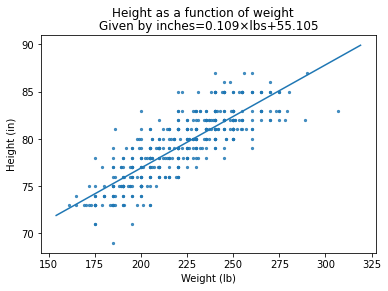

In [9]:
nbadf = pd.read_csv("nba.csv")
ww = nbadf['Weight']
hh = nbadf['Height']

c_1, c_0 = np.polyfit(x=ww, y=hh, deg=1)
Xs = list(range(154,320))
Ys = [c_1*xx + c_0 for xx in Xs]

plt.plot(Xs,Ys)
plt.scatter(ww,hh,s=5,alpha=.8)

plt.suptitle("Height as a function of weight")
plt.title(f"Given by inches={c_1:.3f}×lbs+{c_0:.3f}")
plt.xlabel("Weight (lb)")
plt.ylabel("Height (in)")

## Step 9.

Using the regression line in Step 8, compute and print the “predicted” weight for a rookie player whose height is known 91.



In [10]:
cinv_1 = 1/c_1
cinv_0 = -c_0/c_1

print(f"The predicted weight for the {91} inch tall rookie player is {cinv_1*91+cinv_0:.0f} lbs.")

The predicted weight for the 91 inch tall rookie player is 329 lbs.


---


# Part II: Scatter Plot with Pearson Correlation Coefficient

Consider the article “Integrated systems approach identifies genetic nodes and networks in lateonset Alzheimer's disease” Cell. 2013 Apr 25;153(3):707-20. PMID: 23622250; PMCID: PMC3677161, by Zhang et al.

The gene expression dataset published for this article GSE44768 is available at https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE44768. This dataset has been preprocessed and some portion is available in HuskyCT’s Data folder. The article “GSE44768_article” is also available in HW3 folder. 

Do Part II steps using only the data from the Dementia group (GSE44768_CR_alz_female_reduced.csv).




In [13]:
dem_df = pd.read_csv('GSE44768_CR_alz_female_reduced.csv')
ndem_df = pd.read_csv('GSE44768_CR_nd_female_reduced.csv')

if not FINAL: print(list(dem_df.keys()))

['GSM_ID', 'disease', 'age', 'gender', 'pmi', 'pH', 'rin', 'pres', 'batch', 'tissue', 'XIST', 'TYROBP', 'DOCK2', 'FCER1G', 'GSTA4', 'ABCC2', 'TIMELESS', 'ACBD5', 'LMAN1', 'KIFAP3', 'PCTK2', 'SNCA', 'RPS27', 'RPS18', 'PCBP2', 'STIP1', 'HSPA1A', 'DOPEY1', 'ENPP2', 'GAB2', 'TUBB4', 'ACTG1', 'SLC22A2', 'AGTR1', 'ZIC2', 'TEKT1', 'FANK1', 'HYDIN', 'MED6', 'SFRS3', 'PPP2R5A', 'RNASE11', 'LAMP2', 'P2RX7', 'MID1IP1', 'GJA1', 'STON2', 'CST3', 'CREBBP', 'ABCC11', 'MDGA1', 'SNAP91', 'BSN', 'GLS', 'DTL', 'UBE2C', 'BUB1', 'RFX4', 'DGCR6', 'AQP4', 'MT1M', 'AMPD1', 'EGR2', 'PDGFB']



# Step 1.

Create and show two scatter plots, one comparing gene expression values between TYROBP and DOCK2 and the other comparing gene expression values between TYROBP and GSTA4.

Each plot should have the appropriate title including $r$ (Pearson correlation coefficient value).

Text(0, 0.5, 'DOCK2')

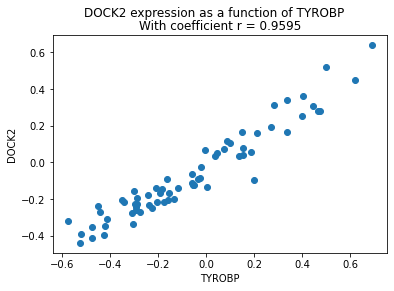

In [12]:
r_p1 = np.corrcoef(x=dem_df['TYROBP'], y=dem_df['DOCK2'])[0,1]

plt.suptitle("DOCK2 expression as a function of TYROBP")
plt.title(f"With coefficient r = {r_p1:.4f}")
plt.scatter(dem_df['TYROBP'], dem_df['DOCK2'])
plt.xlabel('TYROBP')
plt.ylabel('DOCK2')

Text(0, 0.5, 'GSTA4')

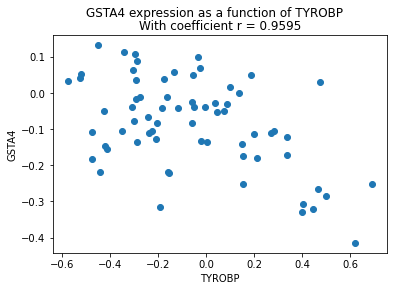

In [14]:
r_p2 = np.corrcoef(x=dem_df['TYROBP'], y=dem_df['GSTA4'])[0,1]

plt.suptitle("GSTA4 expression as a function of TYROBP")
plt.title(f"With coefficient r = {r_p1:.4f}")
plt.scatter(dem_df['TYROBP'], dem_df['GSTA4'])
plt.xlabel('TYROBP')
plt.ylabel('GSTA4')

## Step 2.

Create and show two scatter plots, one comparing gene expression values between TYROBP and FCER1G and the other comparing gene expression values between ACBD5 and LMAN1. This time, both plots should appear side by side. Each plot should have the appropriate title including r.

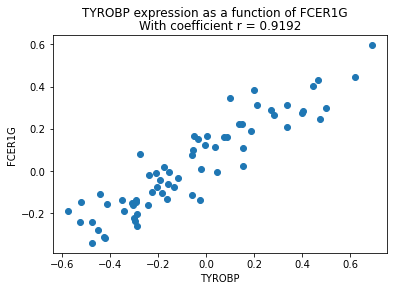

In [15]:
# I wish I could figure out how to do this in a functional manner...

if not FINAL:
    key1='TYROBP'
    key2='FCER1G'

    r_pthis = np.corrcoef(x=dem_df[key1], y=dem_df[key2])[0,1]
    fig = plt.figure()

    plt.suptitle(f"{key1} expression as a function of {key2}")
    plt.title(f"With coefficient r = {r_pthis:.4f}")
    plt.xlabel(key1)
    plt.ylabel(key2)

    plt.scatter(dem_df[key1], dem_df[key2])

# for comparison

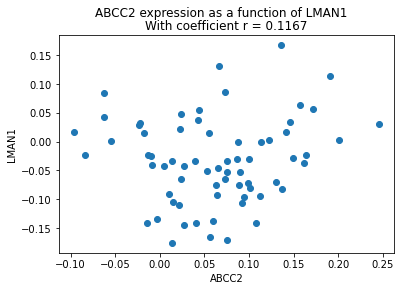

In [16]:
if not FINAL:
    key1='ABCC2' # assuming you mean this...
    key2='LMAN1'

    r_pthis = np.corrcoef(x=dem_df[key1], y=dem_df[key2])[0,1]
    fig = plt.figure()

    plt.suptitle(f"{key1} expression as a function of {key2}")
    plt.title(f"With coefficient r = {r_pthis:.4f}")
    plt.xlabel(key1)
    plt.ylabel(key2)

    plt.scatter(dem_df[key1], dem_df[key2])

# for comparison

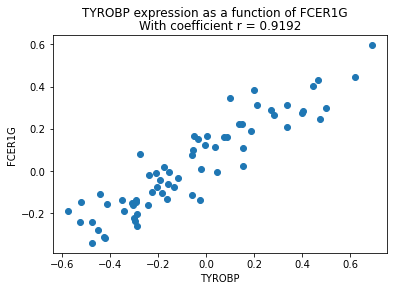

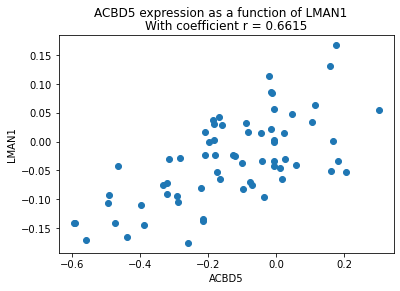

In [17]:
# hmmm, this seems to work!
# todo: i wish i knew how to work with matplotlib in a true functional manner
# (except, of course, the 'side-effect' of printing a graph)

#plt.subplot(221)
key1='TYROBP'
key2='FCER1G'
r_pthis = np.corrcoef(x=dem_df[key1], y=dem_df[key2])[0,1]
plt.suptitle(f"{key1} expression as a function of {key2}")
plt.title(f"With coefficient r = {r_pthis:.4f}")
plt.xlabel(key1)
plt.ylabel(key2)
plt.scatter(dem_df[key1], dem_df[key2])
plt.show()

#plt.figure()
#plt.subplot(222)
key1='ACBD5'
key2='LMAN1'
r_pthis = np.corrcoef(x=dem_df[key1], y=dem_df[key2])[0,1]
fig = plt.figure()
plt.suptitle(f"{key1} expression as a function of {key2}")
plt.title(f"With coefficient r = {r_pthis:.4f}")
plt.xlabel(key1)
plt.ylabel(key2)
plt.scatter(dem_df[key1], dem_df[key2])
plt.show()

# Part III: Correlation Matrix and Heatmap

Now you are analyzing multiple pairs of genes at the same time, i.e., you like to know which pairs would exhibit good positive or negative correlations? Instead of all possible pairs, you will examine pairs from only 10 genes.


## Step 1.

Create and show a 10 x 10 correlation matrix in which TYROBP, DOCK2 and GSTA4
are included

For the other 7 genes, you can choose any from the list for the analysis. Do this
step using only the data from the Dementia group (GSE44768_CR_alz_female_reduced.csv).

Retain your gene order for the rest of Part III analysis.

In [20]:
dem_df = pd.read_csv('GSE44768_CR_alz_female_reduced.csv')
ndem_df = pd.read_csv('GSE44768_CR_nd_female_reduced.csv')
genes = ['TYROBP', 'DOCK2', 'GSTA4',
         'FCER1G', 'ABCC2', 'ACBD5', 'LMAN1', 'KIFAP3', 'PCTK2', 'SNCA']

assert len(genes) == 10

RR = np.corrcoef(dem_df[genes].T)
assert RR.shape == (10,10)

print(RR.round(2))

[[ 1.    0.96 -0.49  0.92 -0.04  0.51  0.03  0.23  0.22  0.01]
 [ 0.96  1.   -0.49  0.87 -0.07  0.57  0.08  0.26  0.24  0.04]
 [-0.49 -0.49  1.   -0.44 -0.51 -0.26  0.08  0.15  0.06  0.41]
 [ 0.92  0.87 -0.44  1.   -0.03  0.36 -0.05  0.07  0.08 -0.04]
 [-0.04 -0.07 -0.51 -0.03  1.    0.06  0.12 -0.14 -0.04 -0.48]
 [ 0.51  0.57 -0.26  0.36  0.06  1.    0.66  0.7   0.69  0.14]
 [ 0.03  0.08  0.08 -0.05  0.12  0.66  1.    0.68  0.7   0.19]
 [ 0.23  0.26  0.15  0.07 -0.14  0.7   0.68  1.    0.74  0.52]
 [ 0.22  0.24  0.06  0.08 -0.04  0.69  0.7   0.74  1.    0.47]
 [ 0.01  0.04  0.41 -0.04 -0.48  0.14  0.19  0.52  0.47  1.  ]]


## Step 2.

Convert correlation matrix you generated in Step 2 into a correlation coefficient heatmap and show. You are required to add title and axis labels appropriately. Do this step using only the data from the Dementia group (GSE44768_CR_alz_female_reduced.csv).


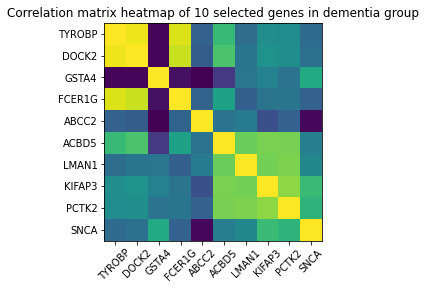

In [21]:
fig, ax = plt.subplots()

ax.set_title("Correlation matrix heatmap of 10 selected genes in dementia group")
ax.set_xticks(list(range(10)))
ax.set_yticks(list(range(10)))
ax.set_xticklabels(genes)
ax.set_yticklabels(genes)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.setp(ax.get_yticklabels(), rotation=0)

ax.imshow(RR)

## Step 3.

This time repeat Steps 1 and 2 for the data from the Non-Dementia group
(GSE44768_CR_nd_female_reduced.csv).


[[ 1.    0.9  -0.61  0.84  0.28  0.27 -0.12 -0.07 -0.17 -0.08]
 [ 0.9   1.   -0.57  0.73  0.05  0.37 -0.06  0.13 -0.04 -0.12]
 [-0.61 -0.57  1.   -0.73 -0.46 -0.04  0.18  0.36  0.44  0.29]
 [ 0.84  0.73 -0.73  1.    0.5  -0.12 -0.38 -0.41 -0.5  -0.23]
 [ 0.28  0.05 -0.46  0.5   1.   -0.22 -0.2  -0.32 -0.43 -0.17]
 [ 0.27  0.37 -0.04 -0.12 -0.22  1.    0.78  0.67  0.7   0.17]
 [-0.12 -0.06  0.18 -0.38 -0.2   0.78  1.    0.52  0.8   0.01]
 [-0.07  0.13  0.36 -0.41 -0.32  0.67  0.52  1.    0.6   0.47]
 [-0.17 -0.04  0.44 -0.5  -0.43  0.7   0.8   0.6   1.    0.1 ]
 [-0.08 -0.12  0.29 -0.23 -0.17  0.17  0.01  0.47  0.1   1.  ]]


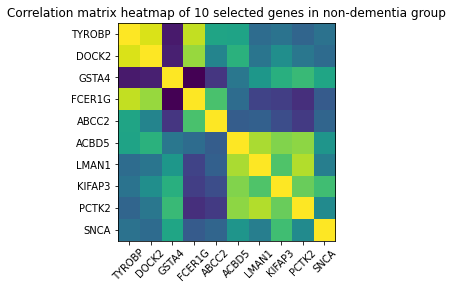

In [22]:
RRndem = np.corrcoef(ndem_df[genes].T)
assert RRndem.shape == (10,10)

print(RRndem.round(2))

fig, ax = plt.subplots()

ax.set_title("Correlation matrix heatmap of 10 selected genes in non-dementia group")
ax.set_xticks(list(range(10)))
ax.set_yticks(list(range(10)))
ax.set_xticklabels(genes)
ax.set_yticklabels(genes)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.setp(ax.get_yticklabels(), rotation=0)

ax.imshow(RRndem)

## Step 4. 

Compare the heatmaps (not correlation matrix) you generated from Steps 2 and 3 side by side.


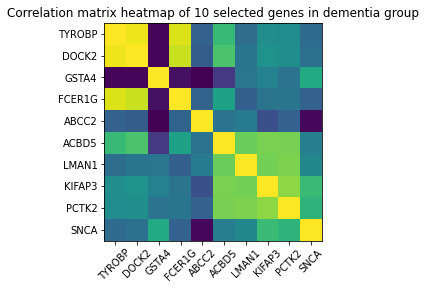

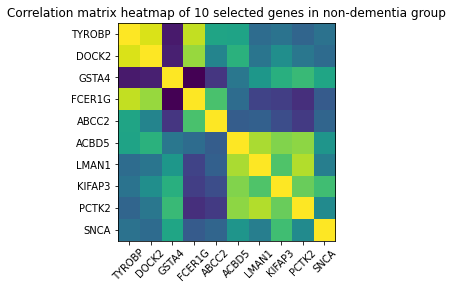

In [23]:
fig1, ax1 = plt.subplots()

ax1.set_title("Correlation matrix heatmap of 10 selected genes in dementia group")
ax1.set_xticks(list(range(10)))
ax1.set_yticks(list(range(10)))
ax1.set_xticklabels(genes)
ax1.set_yticklabels(genes)
plt.setp(ax1.get_xticklabels(), rotation=45)
plt.setp(ax1.get_yticklabels(), rotation=0)
ax1.imshow(RR)

fig2, ax2 = plt.subplots()
ax2.set_title("Correlation matrix heatmap of 10 selected genes in non-dementia group")
ax2.set_xticks(list(range(10)))
ax2.set_yticks(list(range(10)))
ax2.set_xticklabels(genes)
ax2.set_yticklabels(genes)
plt.setp(ax2.get_xticklabels(), rotation=45)
plt.setp(ax2.get_yticklabels(), rotation=0)
ax2.imshow(RRndem)

## Step 5.

Create a markdown cell and discuss your comparison between the two heatmaps you are
showing side by side in Step 4. Do you see any noticeable difference?

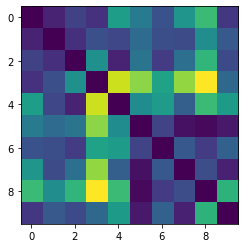

In [24]:
# visualize differences better
if not FINAL:
    fig2, ax2 = plt.subplots()
    ax2.imshow(abs(RR - RRndem))

> **Answer:** There is no difference that is immediately significant to me.
> In both, genes ACBD5 through CTK2 are strongly correlated with one another,
> as are TYROBP, DOCK2, and GSTA4.
> By generating a heatmap of the absolute differences,
> I can see the largest differences are with the gene FCER1G
> and its correlations with other genese.
> The largest difference of them all is between PCTK2 and FCER1G,
> which is much more strongly correlated for dementia patients
> than those without.

# Part IV: Review of Histogram/Boxplot/Violinplot


Consider again the gene expression data set introduced in Part II. You would like to compare histograms for TYROBP’s gene expression levels between the two cohorts, the Dementia group (GSE44768_CR_alz_female_reduced.csv) and the Non-Dementia group
(GSE44768_CR_nd_female_reduced.csv).

Label each plot appropriately including color legend.

In [ ]:
dem_df = pd.read_csv('GSE44768_CR_alz_female_reduced.csv')
ndem_df = pd.read_csv('GSE44768_CR_nd_female_reduced.csv')

## Step 1.

Create and show two histograms for TYROBP’s gene expression level for the Dementia group and the Non-Dementia group, individually, side by side.


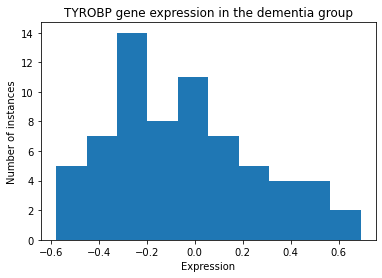

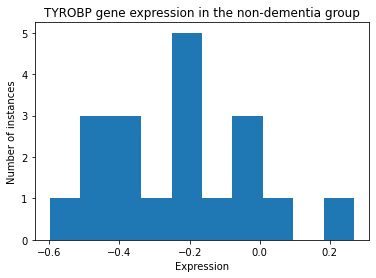

In [60]:
plt.title('TYROBP gene expression in the dementia group')
plt.xlabel('Expression')
plt.ylabel('Number of instances')
plt.hist(dem_df['TYROBP'])
plt.show()

plt.title('TYROBP gene expression in the non-dementia group')
plt.xlabel('Expression')
plt.ylabel('Number of instances')
plt.hist(ndem_df['TYROBP'])
plt.show()

## Step 2.

This time, merge both histograms with different colors, blue for the Dementia group and red for the Non-Dementia group, into one plot.

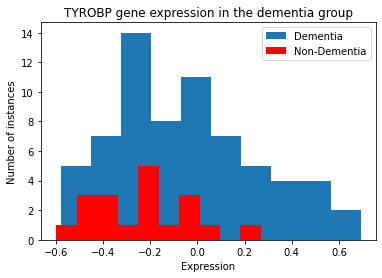

In [59]:
plt.title('TYROBP gene expression')
plt.xlabel('Expression')
plt.ylabel('Number of instances')
plt.hist(dem_df['TYROBP'])
plt.hist(ndem_df['TYROBP'], color='red')
plt.legend(['Dementia', 'Non-Dementia'])
plt.show()

## Step 3.

This time, create and show boxplots for TYROBP’s gene expression level both for the Dementia group and the Non-Dementia group in one plot, side by side.


[]

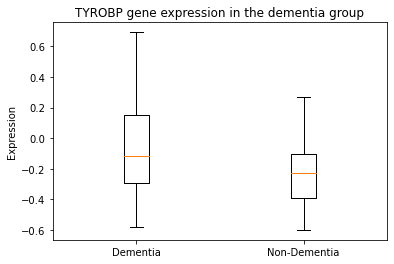

In [61]:
fig, ax = plt.subplots()

plt.title('TYROBP gene expression in the dementia group')
plt.ylabel('Expression')
plt.boxplot([dem_df['TYROBP'], ndem_df['TYROBP']])

ax.set_xticklabels(['Dementia', 'Non-Dementia'])

plt.plot()

## Step 4.

Repeat Step 3 using violinplot again in one plot, side by side. 



[]

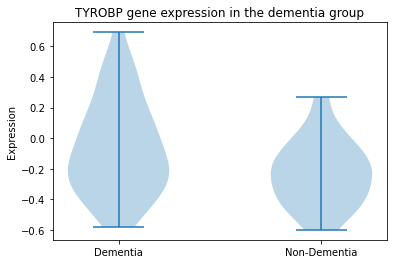

In [62]:
fig, ax = plt.subplots()

plt.title('TYROBP gene expression in the dementia group')
plt.ylabel('Expression')
#plt.violinplot(dem_df['TYROBP'])
#plt.violinplot(ndem_df['TYROBP'])
ax.set_xticks([1,2])
plt.violinplot([dem_df['TYROBP'], ndem_df['TYROBP']])


ax.set_xticklabels(['Dementia', 'Non-Dementia'])

plt.plot()

## Step 5.

Create a markdown cell to include your interpretation for comparing TYROBP gene
expression levels from the two cohorts. We are not interested in checking if your answer is right or not from the perspective of Alzheimer’s Disease but we will check if your reasoning based on your plots is sound or not. 

> **Answer:** While this may be a result of the sample-size or sampling-method, we see few TYROBP expression for values greater than about 0.10, and none greater than about 0.30.
> So, while they have a similar distribution for values <0.10, these results indicate that expression >0.10 might be a very likely indicator for risk of dementia.